In [ ]:
!pip install pafy youtube-dl moviepy

     |████████████████████████████████| 1.9MB 5.1MB/s 


https://learnopencv.com/introduction-to-video-classification-and-human-activity-recognition/

In [ ]:
import os
import cv2
import math
import pafy
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [1]:
!wget -nc --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar
!unrar x UCF50.rar -inul -y

--2021-09-04 12:37:04--  https://www.crcv.ucf.edu/data/UCF50.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 3233554570 (3.0G) [application/rar]
Saving to: ‘UCF50.rar’

UCF50.rar           100%[===================>]   3.01G  59.0MB/s    in 51s     

2021-09-04 12:37:55 (60.4 MB/s) - ‘UCF50.rar’ saved [3233554570/3233554570]



In [2]:
!rm *.rar

In [3]:
!pip install moviepy

In [38]:
from moviepy.editor import VideoFileClip, concatenate_videoclips

i = 0
j = 6
video_1 = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(i) + str(j) + "_c01.avi")
video_2 = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(i) + str(j) + "_c01.avi")
video_3 = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(i) + str(j) + "_c01.avi")
video_4 = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(i) + str(j) + "_c01.avi")
video_5 = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(i) + str(j) + "_c01.avi")
video_6 = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(i) + str(j) + "_c01.avi")
video_7 = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(i) + str(j) + "_c01.avi")
video_8 = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(i) + str(j) + "_c01.avi")
video_9 = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(i) + str(j) + "_c01.avi")
video_10 = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(i) + str(j) + "_c01.avi")



final_video= concatenate_videoclips([video_1, video_2, video_3, video_4, video_5])#, video_6, video_7, video_8, video_9])#, video_10 ])
final_video.write_videofile("Biking" + str(i) + str(j) + ".mp4")

[MoviePy] >>>> Building video Biking06.mp4
[MoviePy] Writing video Biking06.mp4


100%|██████████| 505/505 [00:04<00:00, 125.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Biking06.mp4 



In [57]:
L = []
video_1 = VideoFileClip("/content/UCF50/Biking/v_Biking_g25_c01.avi")
L.append(video_1)
#print(video_1)
final_clip = concatenate_videoclips(L)
final_clip.to_videofile("output.mp4", fps=24, remove_temp=False)

[MoviePy] >>>> Building video output.mp4
[MoviePy] Writing video output.mp4


100%|██████████| 121/121 [00:00<00:00, 158.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output.mp4 



In [3]:
%cd /content/UCF50

/content/UCF50


In [6]:
#CODE for finding number of clips of one video and joining to make one consolidate video
import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips

CATEGORIES = ["Biking"]#, "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]

if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []
    occur = []
    for i in range(25):
      occur.append(0)
    print(occur)
    for category in CATEGORIES:
        print("Processing category %s" % category)
        cou = 0
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "UCF50", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []
        #print((filenames[0][10]) + (filenames[0][11]))
        #occur[int((filenames[0][10]) + (filenames[0][11]))] = occur[int((filenames[0][10]) + (filenames[0][11]))] + 1

        for filename in filenames:
          filepath = os.path.join("..", "UCF50", category, filename)
          path = "/content/UCF50/" + category + "/" + filename
          video_id = category
          print(filename)
          video_no = filename[10] + filename[11]
          occur[int(video_no) - 1] = occur[int(video_no) - 1] + 1
            #video_list = []
        #    print(video_no)
            #for no in video_no:
              #print(filename[14] + filename[15])
              #print(no)

L = []
for i in range(25):
  for j in range(int(occur[i])):
    #print(len(str(i)))
    #print(j+1)
    if(len(str(i+1)) < 2):
      if(len(str(j + 1)) < 2):
        video = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(0) + str(int(i)+1) + "_c" + str(0) + str(int(j)+1) + ".avi")
        L.append(video)
      else:
        video = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(0) + str(int(i)+1) + "_c" + str(int(j)+1) + ".avi")
        L.append(video)
    else:
      if(len(str(j + 1)) < 2):
        video = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(int(i)+1) + "_c" + str(0) + str(int(j)+1) + ".avi")
        L.append(video)
      else:
        video = VideoFileClip("/content/UCF50/Biking/v_Biking_g" + str(int(i)+1) + "_c" + str(int(j)+1) + ".avi")
        L.append(video)
  video_id = 'Biking'
  #print(L)
  try: 
    if not os.path.exists(f'data/{video_id}'): 
      os.makedirs(f'data/{video_id}')
        
      
  except OSError: 
    print ('Error: Creating directory of data')

  final_clip = concatenate_videoclips(L)
  final_clip.to_videofile("/content/UCF50/data/" + video_id + "/" + "Biking" + str(int(i)+1) + ".mp4", fps=24, remove_temp=False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Processing category Biking
v_Biking_g16_c05.avi
v_Biking_g18_c04.avi
v_Biking_g19_c02.avi
v_Biking_g12_c02.avi
v_Biking_g10_c04.avi
v_Biking_g21_c04.avi
v_Biking_g10_c02.avi
v_Biking_g16_c03.avi
v_Biking_g13_c05.avi
v_Biking_g25_c04.avi
v_Biking_g24_c03.avi
v_Biking_g13_c06.avi
v_Biking_g02_c07.avi
v_Biking_g19_c01.avi
v_Biking_g08_c04.avi
v_Biking_g07_c01.avi
v_Biking_g20_c07.avi
v_Biking_g22_c04.avi
v_Biking_g11_c06.avi
v_Biking_g05_c02.avi
v_Biking_g08_c02.avi
v_Biking_g18_c05.avi
v_Biking_g06_c01.avi
v_Biking_g06_c05.avi
v_Biking_g07_c05.avi
v_Biking_g17_c04.avi
v_Biking_g13_c02.avi
v_Biking_g06_c04.avi
v_Biking_g22_c02.avi
v_Biking_g21_c02.avi
v_Biking_g15_c04.avi
v_Biking_g12_c03.avi
v_Biking_g21_c12.avi
v_Biking_g22_c01.avi
v_Biking_g01_c03.avi
v_Biking_g24_c04.avi
v_Biking_g25_c01.avi
v_Biking_g15_c01.avi
v_Biking_g07_c04.avi
v_Biking_g02_c03.avi
v_Biking_g12_c04.avi
v_Biking_g17_c03.avi
v_Biking_g15_c0

100%|██████████| 508/508 [00:04<00:00, 125.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking1.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking2.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking2.mp4


100%|██████████| 1806/1806 [00:14<00:00, 126.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking2.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking3.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking3.mp4


100%|██████████| 3004/3004 [00:22<00:00, 135.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking3.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking4.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking4.mp4


100%|█████████▉| 3876/3877 [00:29<00:00, 131.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking4.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking5.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking5.mp4


100%|██████████| 5412/5412 [00:41<00:00, 131.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking5.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking6.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking6.mp4


100%|██████████| 6129/6129 [00:48<00:00, 125.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking6.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking7.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking7.mp4


100%|██████████| 7564/7564 [00:57<00:00, 131.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking7.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking8.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking8.mp4


100%|██████████| 8530/8530 [01:06<00:00, 128.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking8.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking9.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking9.mp4


100%|██████████| 9137/9137 [01:11<00:00, 128.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking9.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking10.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking10.mp4


100%|██████████| 10290/10290 [01:21<00:00, 127.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking10.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking11.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking11.mp4


100%|██████████| 11051/11051 [01:26<00:00, 127.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking11.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking12.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking12.mp4


100%|██████████| 11728/11728 [01:33<00:00, 124.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking12.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking13.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking13.mp4


100%|██████████| 12571/12571 [01:41<00:00, 123.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking13.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking14.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking14.mp4


100%|██████████| 13046/13046 [01:46<00:00, 122.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking14.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking15.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking15.mp4


100%|██████████| 14007/14007 [01:53<00:00, 123.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking15.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking16.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking16.mp4


100%|██████████| 14829/14829 [02:00<00:00, 122.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking16.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking17.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking17.mp4


100%|██████████| 15806/15806 [02:08<00:00, 123.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking17.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking18.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking18.mp4


100%|██████████| 16733/16733 [02:17<00:00, 122.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking18.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking19.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking19.mp4


100%|██████████| 17217/17217 [02:23<00:00, 119.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking19.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking20.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking20.mp4


100%|██████████| 19685/19685 [02:41<00:00, 121.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking20.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking21.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking21.mp4


100%|██████████| 21795/21795 [02:59<00:00, 121.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking21.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking22.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking22.mp4


100%|██████████| 22854/22854 [03:12<00:00, 118.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking22.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking23.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking23.mp4


100%|██████████| 24484/24484 [03:22<00:00, 120.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking23.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking24.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking24.mp4


100%|██████████| 25779/25779 [03:33<00:00, 120.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking24.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking25.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking25.mp4


100%|██████████| 26322/26322 [03:37<00:00, 120.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking25.mp4 



In [11]:
%cd /content/UCF50/data

/content/UCF50/data


In [4]:
#CODE FOR EXTRACTING PIXEL VALUES as features and storing as feature files all categories in one pickle file

import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os

from sklearn.cluster import KMeans, spectral_clustering
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from scipy.signal import find_peaks

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

import tensorflow as tf
import shutil

def sort_frames(list_of_frames, video_id):
    return sorted(list_of_frames, key=lambda x: int(x.split(f'data/frames/{video_id}/')[1].split('.jpg')[0]))

def get_image_features(frames_filepaths):
  image_features = []
  model = VGG16(weights='imagenet', include_top=False)
  for img_path in frames_filepaths:
      print(img_path)
      img = image.load_img(img_path, target_size=(224, 224))
      img_data = image.img_to_array(img)
      img_data = np.expand_dims(img_data, axis=0)
      img_data = preprocess_input(img_data)

      vgg16_feature = model.predict(img_data)
      image_features.append(np.array(vgg16_feature).flatten())
  return image_features

def kmeans(image_features, n_clusters):
  silhouette = np.zeros(n_clusters)
  for k in range(2, n_clusters):
    kmeans = KMeans(n_clusters=k).fit_predict(image_features)
    silhouette[k] = silhouette_score(image_features, kmeans)
    print(f'{k} cluster complete')
  return silhouette

def random_frame_idxs_for_cluster(kmeans_labels):
  idxs = []
  for label in range(len(np.unique(kmeans_labels))):
    idxs.append(np.random.choice(np.argwhere(kmeans_labels == label).flatten(), 1)[0])
  return np.sort(np.array(idxs))

def closest_to_centroid_frames(kmeans, image_list, image_features):
  closest, _ = pairwise_distances_argmin_min(
      kmeans.cluster_centers_, image_features)
  return np.array(image_list)[closest]

def create_video_from_frames(frames, title, fps=30, fourcc=cv2.VideoWriter_fourcc('m','p','4','v')):
    img_array = []
    for filename in frames:
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter(title, fourcc, 30, size)
    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()



CATEGORIES = ["Biking"]#, "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]#, "handwaving"]#, "jogging", "running", 
   # "walking"]

if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []

    for category in CATEGORIES:
        print("Processing category %s" % category)
        cou = 0
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "UCF50", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []

        for filename in filenames:
            filepath = os.path.join("..", "UCF50", category, filename)
            path = "/content/UCF50/" + category + "/" + filename
            video_id = category
            cou = cou + 1
            video = filepath
            video_capture = cv2.VideoCapture(video)
            currentframe = 0
            try: 
              if not os.path.exists(f'data/frames/{video_id}'): 
                os.makedirs(f'data/frames/{video_id}') 
            except OSError: 
              print ('Error: Creating directory of data')
            while(True): 
              ret, frame = video_capture.read() 
              if ret: 
                name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
                print ('Creating...' + name) 
                cv2.imwrite(name, frame) 
                currentframe += 1
              else: 
                break
            video_capture.release() 
            cv2.destroyAllWindows()

            ec_images = glob.glob('data/frames/'+ category + '/*')
            print(ec_images)
            ec_images = sort_frames(ec_images, category)
            images_features = get_image_features(ec_images)
            kmeans5 = KMeans(n_clusters=5, random_state=42).fit(images_features)
            five_frames = closest_to_centroid_frames(kmeans5, ec_images, images_features)
            sorted_five_frames = sort_frames(five_frames, category)
            original_frames = sort_frames(sorted_five_frames, category)
            try: 
              if not os.path.exists(f'dataset/new/{video_id}'): 
                os.makedirs(f'dataset/new/{video_id}')
                 
                
            except OSError: 
              print ('Error: Creating directory of data')
            create_video_from_frames(original_frames, '/content/UCF50/dataset/new/'+ video_id + '/' + category + str(cou)+'.mp4')

            shutil.rmtree(f'data/frames/{video_id}')


            n_processed_files += 1
            if n_processed_files % 30 == 0:
                print("Done %d files" % n_processed_files)

        # Dump data to file.
#pickle.dump(features, open("data/pixel.p" , "wb"))




Processing category Biking
Creating...data/frames/Biking/0.jpg
Creating...data/frames/Biking/1.jpg
Creating...data/frames/Biking/2.jpg
Creating...data/frames/Biking/3.jpg
Creating...data/frames/Biking/4.jpg
Creating...data/frames/Biking/5.jpg
Creating...data/frames/Biking/6.jpg
Creating...data/frames/Biking/7.jpg
Creating...data/frames/Biking/8.jpg
Creating...data/frames/Biking/9.jpg
Creating...data/frames/Biking/10.jpg
Creating...data/frames/Biking/11.jpg
Creating...data/frames/Biking/12.jpg
Creating...data/frames/Biking/13.jpg
Creating...data/frames/Biking/14.jpg
Creating...data/frames/Biking/15.jpg
Creating...data/frames/Biking/16.jpg
Creating...data/frames/Biking/17.jpg
Creating...data/frames/Biking/18.jpg
Creating...data/frames/Biking/19.jpg
Creating...data/frames/Biking/20.jpg
Creating...data/frames/Biking/21.jpg
Creating...data/frames/Biking/22.jpg
Creating...data/frames/Biking/23.jpg
Creating...data/frames/Biking/24.jpg
Creating...data/frames/Biking/25.jpg
Creating...data/frame

KeyboardInterrupt: ignored

In [6]:
shutil.rmtree(f'data/frames/{video_id}')

In [ ]:
import zipfile
from google.colab import files

with zipfile.ZipFile("Biking.zip", 'w') as myzip:
  for i in range(25):
    myzip.write('/content/UCF50/data/Biking/Biking'+ str(i+1) + '.mp4')

files.download("Biking.zip")

In [ ]:
# Create a Matplotlib figure
plt.figure(figsize = (30, 30))

# Get Names of all classes in UCF50
all_classes_names = os.listdir('UCF50')

# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):

    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]

    # Getting a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'UCF50/{selected_class_Name}')

    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)

    # Reading the Video File Using the Video Capture
    video_reader = cv2.VideoCapture(f'UCF50/{selected_class_Name}/{selected_video_file_name}')
    
    # Reading The First Frame of the Video File
    _, bgr_frame = video_reader.read()

    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()

    # Converting the BGR Frame to RGB Frame 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Adding The Class Name Text on top of the Video Frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image_height, image_width = 64, 64
max_images_per_class = 8000

dataset_directory = "UCF50"
classes_list = ["WalkingWithDog", "TaiChi", "Swing", "HorseRace"]

model_output_size = len(classes_list)

In [ ]:
def frames_extraction(video_path):
    # Empty List declared to store video frames
    frames_list = []
    
    # Reading the Video File Using the VideoCapture
    video_reader = cv2.VideoCapture(video_path)

    # Iterating through Video Frames
    while True:

        # Reading a frame from the video file 
        success, frame = video_reader.read() 

        # If Video frame was not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Appending the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()

    # returning the frames list 
    return frames_list

In [ ]:
def create_dataset():

    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    labels = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
        
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))

        # Iterating through all the files present in the files list
        for file_name in files_list:

            # Construct the complete video path
            video_file_path = os.path.join(dataset_directory, class_name, file_name)

            # Calling the frame_extraction method for every video file path
            frames = frames_extraction(video_file_path)

            # Appending the frames to a temporary list.
            temp_features.extend(frames)
        
        # Adding randomly selected frames to the features list
        features.extend(random.sample(temp_features, max_images_per_class))

        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * max_images_per_class)
        
        # Emptying the temp_features list so it can be reused to store all frames of the next class.
        temp_features.clear()

    # Converting the features and labels lists to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels

In [ ]:
features, labels = create_dataset()

Extracting Data of Class: WalkingWithDog
Extracting Data of Class: TaiChi
Extracting Data of Class: Swing
Extracting Data of Class: HorseRace


In [ ]:
print(labels)

[0 0 0 ... 3 3 3]


In [ ]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.2, shuffle = True, random_state = seed_constant)

In [ ]:
print(features_train.shape)
print(labels_train.shape)

(25600, 64, 64, 3)
(25600, 4)


In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from keras.preprocessing import image
import numpy as np
from skimage.transform import resize

In [ ]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(features_train)
print(X.shape)
test_image = preprocess_input(features_test)
print(test_image.shape)

(25600, 64, 64, 3)
(6400, 64, 64, 3)


In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [ ]:
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
X = base_model.predict(X)
print(X)
test_image = base_model.predict(test_image)
print(test_image)

[[[[0.        0.        0.        ... 0.        1.1409168 0.       ]
   [0.        0.        0.        ... 0.        4.6828203 0.       ]]

  [[0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]]]


 [[[0.        0.        0.        ... 0.        1.1760464 0.       ]
   [0.        0.        0.        ... 0.        4.6628594 0.       ]]

  [[0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]]]


 [[[0.        0.        0.        ... 0.        1.3042154 0.       ]
   [0.        0.        0.        ... 0.        4.658821  0.       ]]

  [[0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]]]


 ...


 [[[0.        0.        0.        ... 0.        1.6606107 0.       ]
   [0.        0.        0.        ... 0.        4.797641  0.       ]]

  [[0. 

In [ ]:
print(X.shape)
print(test_image.shape)

(25600, 2048)
(6400, 2048)


In [ ]:
#X = X.reshape(25600, 7*7*512)
X = X.reshape(25600, 2*2*512)
#X_train = X_train.reshape(208, 224*224*3)
test_image = test_image.reshape(6400, 2*2*512)
#test_image = test_image.reshape(186, 224*224*3)
print(X.shape)
print(test_image.shape)

(25600, 2048)
(6400, 2048)


In [ ]:
train = X/X.max()
test_image = test_image/test_image.max()

In [ ]:
model = Sequential()
model.add(InputLayer((2*2*512,)))    # input layer
#model.add(InputLayer((224*224*3,)))
model.add(Dense(units=1024, activation='sigmoid'))   # hidden layer
model.add(Dropout(0.5))      # adding dropout
model.add(Dense(units=512, activation='sigmoid'))    # hidden layer
model.add(Dropout(0.5))      # adding dropout
model.add(Dense(units=256, activation='sigmoid'))    # hidden layer
model.add(Dropout(0.5))      # adding dropout
#model.add(Dense(3, activation='softmax'))  
model.add(Dense(4, activation='sigmoid'))  

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train, labels_train , epochs=10, validation_data=(test_image, labels_test))

Epoch 1/10
800/800 [==============================] - 23s 29ms/step - loss: 1.3871 - accuracy: 0.2513 - val_loss: 1.3871 - val_accuracy: 0.2469
Epoch 2/10
800/800 [==============================] - 22s 28ms/step - loss: 1.3869 - accuracy: 0.2470 - val_loss: 1.3864 - val_accuracy: 0.2522
Epoch 3/10
800/800 [==============================] - 23s 28ms/step - loss: 1.3867 - accuracy: 0.2489 - val_loss: 1.3866 - val_accuracy: 0.2423
Epoch 4/10
800/800 [==============================] - 22s 28ms/step - loss: 1.3867 - accuracy: 0.2479 - val_loss: 1.3863 - val_accuracy: 0.2522
Epoch 5/10
800/800 [==============================] - 23s 29ms/step - loss: 1.3865 - accuracy: 0.2497 - val_loss: 1.3868 - val_accuracy: 0.2469
Epoch 6/10
800/800 [==============================] - 23s 28ms/step - loss: 1.3865 - accuracy: 0.2488 - val_loss: 1.3866 - val_accuracy: 0.2423
Epoch 7/10
800/800 [==============================] - 23s 28ms/step - loss: 1.3865 - accuracy: 0.2496 - val_loss: 1.3866 - val_accuracy:

In [ ]:
predictions = model.predict_classes(test_image)
#print(predictions.shape)
print(predictions)
#print(test_y)

[1 1 1 ... 1 1 1]


In [ ]:
scores = model.evaluate(test_image, labels_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

200/200 [==============================] - 2s 8ms/step - loss: 1.3866 - accuracy: 0.2423
accuracy: 24.23%


In [ ]:
# Let's create a function that will construct our model
def create_model():

    # We will use a Sequential model for model construction
    model = Sequential()

    # Defining The Model Architecture
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(model_output_size, activation = 'softmax'))

    # Printing the models summary
    model.summary()

    return model


# Calling the create_model method
model = create_model()

print("Model Created Successfully!")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               16640     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)              

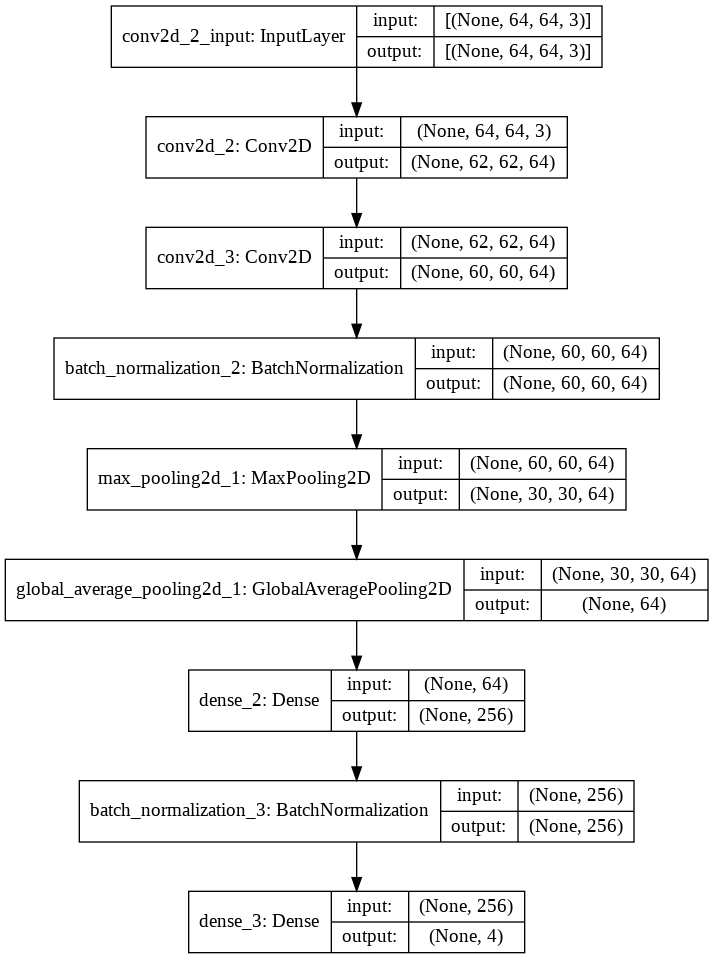

In [ ]:
plot_model(model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# Adding Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start Training
model_training_history = model.fit(x = features_train, y = labels_train, epochs = 1, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

5120/5120 [==============================] - 518s 101ms/step - loss: 1.0195 - accuracy: 0.5758 - val_loss: 1.2966 - val_accuracy: 0.6385


In [ ]:
model_evaluation_history = model.evaluate(features_test, labels_test)

200/200 [==============================] - 34s 170ms/step - loss: 1.3530 - accuracy: 0.6245


In [ ]:
# Creating a useful name for our model, incase you're saving multiple models (OPTIONAL)
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
model_name = f'Model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Saving your Model
model.save(model_name)

In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()
  #plt.show()

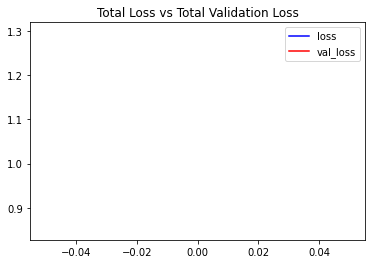

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

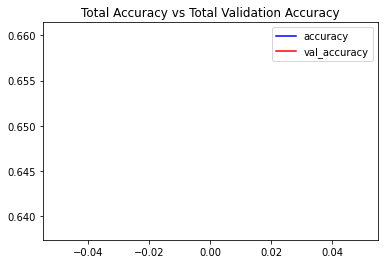

In [ ]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [ ]:
def download_youtube_videos(youtube_video_url, output_directory):
    # Creating a Video object which includes useful information regarding the youtube video.
    video = pafy.new(youtube_video_url)

    # Getting the best available quality object for the youtube video.
    video_best = video.getbest()

    # Constructing the Output File Path
    output_file_path = f'{output_directory}/{video.title}.mp4'

    # Downloading the youtube video at the best available quality.
    video_best.download(filepath = output_file_path, quiet = True)

    # Returning Video Title
    return video.title

In [ ]:
def predict_on_live_video(video_file_path, output_file_path, window_size):

    # Initialize a Deque Object with a fixed size which will be used to implement moving/rolling average functionality.
    predicted_labels_probabilities_deque = deque(maxlen = window_size)

    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)

    # Getting the width and height of the video 
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Writing the Overlayed Video Files Using the VideoWriter Object
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 24, (original_video_width, original_video_height))

    while True: 

        # Reading The Frame
        status, frame = video_reader.read() 

        if not status:
            break

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]

        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_deque.append(predicted_labels_probabilities)

        # Assuring that the Deque is completely filled before starting the averaging process
        if len(predicted_labels_probabilities_deque) == window_size:

            # Converting Predicted Labels Probabilities Deque into Numpy array
            predicted_labels_probabilities_np = np.array(predicted_labels_probabilities_deque)

            # Calculating Average of Predicted Labels Probabilities Column Wise 
            predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

            # Converting the predicted probabilities into labels by returning the index of the maximum value.
            predicted_label = np.argmax(predicted_labels_probabilities_averaged)

            # Accessing The Class Name using predicted label.
            predicted_class_name = classes_list[predicted_label]
          
            # Overlaying Class Name Text Ontop of the Frame
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Writing The Frame
        video_writer.write(frame)


        # cv2.imshow('Predicted Frames', frame)

        # key_pressed = cv2.waitKey(10)

        # if key_pressed == ord('q'):
        #     break

    # cv2.destroyAllWindows()

    
    # Closing the VideoCapture and VideoWriter objects and releasing all resources held by them. 
    video_reader.release()
    video_writer.release()

In [ ]:
# Creating The Output directories if it does not exist
output_directory = 'Youtube_Videos'
os.makedirs(output_directory, exist_ok = True)

# Downloading a YouTube Video
video_title = download_youtube_videos('https://www.youtube.com/watch?v=8u0qjmHIOcE', output_directory)

# Getting the YouTube Video's path you just downloaded
input_video_file_path = f'{output_directory}/{video_title}.mp4'

In [ ]:
# Setting sthe Window Size which will be used by the Rolling Average Proces
window_size = 1

# Constructing The Output YouTube Video Path
output_video_file_path = f'{output_directory}/{video_title} -Output-WSize {window_size}.mp4'

# Calling the predict_on_live_video method to start the Prediction.
predict_on_live_video(input_video_file_path, output_video_file_path, window_size)

# Play Video File in the Notebook
VideoFileClip(output_video_file_path).ipython_display(width = 700)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def make_average_predictions(video_file_path, predictions_frames_count):
    
    # Initializing the Numpy array which will store Prediction Probabilities
    predicted_labels_probabilities_np = np.zeros((predictions_frames_count, model_output_size), dtype = np.float)

    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)

    # Getting The Total Frames present in the video 
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculating The Number of Frames to skip Before reading a frame
    skip_frames_window = video_frames_count // predictions_frames_count

    for frame_counter in range(predictions_frames_count): 

        # Setting Frame Position
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading The Frame
        _ , frame = video_reader.read() 

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]

        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_np[frame_counter] = predicted_labels_probabilities

    # Calculating Average of Predicted Labels Probabilities Column Wise 
    predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

    # Sorting the Averaged Predicted Labels Probabilities
    predicted_labels_probabilities_averaged_sorted_indexes = np.argsort(predicted_labels_probabilities_averaged)[::-1]

    # Iterating Over All Averaged Predicted Label Probabilities
    for predicted_label in predicted_labels_probabilities_averaged_sorted_indexes:

        # Accessing The Class Name using predicted label.
        predicted_class_name = classes_list[predicted_label]

        # Accessing The Averaged Probability using predicted label.
        predicted_probability = predicted_labels_probabilities_averaged[predicted_label]

        print(f"CLASS NAME: {predicted_class_name}   AVERAGED PROBABILITY: {(predicted_probability*100):.2}")
    
    # Closing the VideoCapture Object and releasing all resources held by it. 
    video_reader.release()

In [ ]:
# Downloading The YouTube Video
video_title = download_youtube_videos('https://www.youtube.com/watch?v=ceRjxW4MpOY', output_directory)

# Constructing The Input YouTube Video Path
input_video_file_path = f'{output_directory}/{video_title}.mp4'

# Calling The Make Average Method To Start The Process
make_average_predictions(input_video_file_path, 50)

# Play Video File in the Notebook
VideoFileClip(input_video_file_path).ipython_display(width = 700)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Downloading The YouTube Video
video_title = download_youtube_videos('https://www.youtube.com/watch?v=ayI-e3cJM-0', output_directory)

# Constructing The Input YouTube Video Path
input_video_file_path = f'{output_directory}/{video_title}.mp4'

# Calling The Make Average Method To Start The Process
make_average_predictions(input_video_file_path, 50)

# Play Video File in the Notebook
VideoFileClip(input_video_file_path).ipython_display(width = 700)


CLASS NAME: TaiChi   AVERAGED PROBABILITY: 9e+01
CLASS NAME: Swing   AVERAGED PROBABILITY: 1e+01
CLASS NAME: WalkingWithDog   AVERAGED PROBABILITY: 0.17
CLASS NAME: HorseRace   AVERAGED PROBABILITY: 0.065


100%|██████████| 1650/1650 [00:29<00:00, 55.99it/s]
